# 北尾早霧・砂川武貴・山田知明『定量的マクロ経済学と数値計算』日本評論社
## 第2章：2期間モデル・3期間モデルと数値計算の概観
    * 2.1節から2.4節まで

## 数値計算に入る前にJupyter Notebookの使い方について簡単に説明
* **Jupyter Noterbook**と**Jupyter Lab**の2種類がある
    * インストール方法はNotionで説明
* どちらを使っても構わない
    * 現時点ではJupter Notebookの方が完成度は高い
        * スライドを作成できるRISEなどの機能が揃っている
    * Jupyter Labの方が新しいため新機能は今後こちらに追加される

## Jupyter Notebookの使い方
* セル内に**数式**を書いて**実行**をすることでコードを走らせることが出来る
    * 実行は⬆にある▷ボタンを押すか、セルを選択して**Shift + Return (Enter)**
* セルに説明書きを加えたりメモを取ることも可能
    * 上にあるタブをCode→**Markdown**に変更
    * 実行は同じく**Shift + Return (Enter)**
* 書き方は**Markdown記法**
* 数式の書き方は$\LaTeX$の記法と同じ

---

In [1]:
versioninfo()

Julia Version 1.7.3
Commit 742b9abb4d (2022-05-06 12:58 UTC)
Platform Info:
  OS: macOS (x86_64-apple-darwin21.4.0)
  CPU: Intel(R) Core(TM) i7-8569U CPU @ 2.80GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-12.0.1 (ORCJIT, skylake)


---

## 2.2 ベンチマークモデルとカリブレーション

### 2.2.1 ベンチマークモデル：2期間モデル
* 詳細はテキストを参照
* 基本的な2期間モデルを使って数値計算の基本的な考え方を丁寧に説明をしていく
* ある経済主体は2期間生存するとしよう
    * 1期目の消費$c_{1}$と貯蓄$a$、2期目の消費$c_{2}$を決定：実際にはどれか一つを決定すれば他は予算制約から自動的に決定
    * 労働供給に関する意思決定はなし
* 予算制約：1期目
$$
    c_{1} + a = w
$$
    * wは1期期初に保有している所得
* 予算制約：2期目
$$
    c_{2} = (1+r)a
$$
    * 貯蓄には$r$だけの金利が発生する
* 経済主体の目的関数は2期間の効用の和を最大にすること
$$
    U(c_{1}, c_{2}) = u(c_{1}) + \beta u(c_{2})
$$
    * $\beta$は**割引因子(discount factor)**

### 一階条件
$$
    u'(c_{1}) = (1+r) \beta u'(c_{2})
$$
### 政策関数
* 我々が知りたいのは**政策関数(policy function)**
$$
    a = g(w)
$$

---

## 2.2.2 カリブレーション（Calibration）
* 関数型を特定化してパラメータを設定する一連の作業を**カリブレーション（calibration）**と呼ぶ
* 本格的な研究の場合、ここの値をもっと真面目に設定
    * マクロ・ミクロデータから推計
* 今回はデモンストレーションなので"それっぽい"数値を使う

---

#### Tips：コメント
* #(シャープ)の右側は実行されない：**コメント**
* コメントを適切につけることを心がけると**共同研究者**や**未来の自分**が助かる
* コメントは極力英語(半角)で書いたほうが良い
    * この教科書は教育目的なので日本語で書いています
* 実行する箇所に全角が交じるとコードが動かなくなる場合があるので注意
    * 全角スペースは特に見つけづらいので注意が必要
    * たまにあるミス：カギ括弧が片方だけ全角

---

In [2]:
# 変数名はモデルと同じ名前にすると読みやすい(がマストではない)
beta = 0.985^30 # 割引因子(discount factor) 30年分
gamma = 2.0 # 相対的危険回避度

2.0

#### Tips：JuliaはUnicode（UTF-8）に対応しているのでギリシャ文字がそのまま使える
* 他の多くの言語ではこの方法は使えない

In [3]:
# \betaと書いてTabキーを押すとギリシャ文字に変換
β = 0.985^30 # 割引因子(discount factor) 30年分

0.6354580927313491

In [4]:
# \gamma
γ = 2.0 # 相対的危険回避度(relative risk aversion)

2.0

In [5]:
rent = 1.025^30 - 1.0 # 30年分の利息(1を引いているので純(net))

1.0975675790817858

---

## 2.3 離散近似とグリッド
* 状態変数$w$を離散個の点で表現する→**グリッド(grid)**
* グリッドは点の集まり
    * 例えばグリッド数を10個にする場合：$w_{i} \in \{ w_1, ..., w_{10} \}$
    * $w_{1}$：所得の最小値
    * $w_{10}$：所得の最大値

In [6]:
# 実行文の最後に;を書くと実行結果の表示を省略できる
# ;がないと実行文の最後の結果のみJupyter Notebookに出力される

nw = 10; # グリッドの数
w_min = 0.1; # 所得の最小値
w_max = 1.0; # 所得の最大値

In [7]:
# ;なしで実行をすると計算結果や今の変数の値が確認出来る
nw

10

In [8]:
w_max

1.0

In [9]:
w_min

0.1

### LinRange関数を使ってグリッド生成

In [10]:
# グリッドを生成するためにLinRangeという関数を使う
# w_minからw_maxまでの範囲でnw個の点を生成する
# 今回の場合、0.1から1.0まで10個の点を生成

temp = LinRange(w_min, w_max, nw)

10-element LinRange{Float64, Int64}:
 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0

---

## Tips：関数となにか?

`LinRange`は**関数(function)**
* 関数名(引数, 引数)という感じで使う
    * 関数の中に入れるインプットのことを**引数（argument）**と呼ぶ
    * `z = function_name(x, y)`のような感じで使う
* 関数の機能が知りたい場合、?でヘルプを呼び出す

In [11]:
? LinRange # ヘルプは基本的に英語

search: LinRange



```
LinRange{T,L}
```

A range with `len` linearly spaced elements between its `start` and `stop`. The size of the spacing is controlled by `len`, which must be an `Integer`.

# Examples

```jldoctest
julia> LinRange(1.5, 5.5, 9)
9-element LinRange{Float64, Int64}:
 1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5
```

Compared to using [`range`](@ref), directly constructing a `LinRange` should have less overhead but won't try to correct for floating point errors:

```julia
julia> collect(range(-0.1, 0.3, length=5))
5-element Array{Float64,1}:
 -0.1
  0.0
  0.1
  0.2
  0.3

julia> collect(LinRange(-0.1, 0.3, 5))
5-element Array{Float64,1}:
 -0.1
 -1.3877787807814457e-17
  0.09999999999999999
  0.19999999999999998
  0.3
```


### Juliaにおける関数（function）
* 言語によって**サブルーチン（subroutine）**と呼ばれることもある（Fortranとか）
    * 正確にはFortranでは一つの変数を返すものを関数（function）、複数のインプットとアウトプットがあるものをサブルーチン（subroutine）と呼んでいる
* **関数**：プログラムを一つの意味単位で区切ったもの
* 頻繁に使う計算は独立した関数としてひとまとめにして何回も呼び出す形にしたほうが良い
    * 経済学の場合、Cobb-Douglas型生産関数、CRRA型効用関数など
    * ⬇で実際に効用関数や生産関数を例示しています
* 他人が書いたコードを再利用しやすくなる！
    * JuliaのPackageでインストールしたものも他人が書いたコード(の一部)
    * 上のLinRangeも関数
    * 他人（あるいは自分）が書いた関数をまとめたものを**ライブラリ（library）**と呼ぶ
    * ライブラリの充実度がその言語が何に向いているのかを決定する上で重要
        * 例：Pythonは機械学習のライブラリが充実している

LinRangeと似たような関数として`range`がある
* `range`だと浮動小数点の誤差を補正してくれる：詳細は⬇を参照
* 例えば理論上は0だけど数値計算誤差でごく微小な値になる場合、rangeは修正をするけど、LinRangeはそのまま

---

LinRangeが返す変数の型(type)が使いにくいので変換したい
* 型とはなにか?→⬇のTipsを参照

In [12]:
typeof(temp) # 型がLinRange{Float64, Int64}

LinRange{Float64, Int64}

### 型をLinRange{Float64, Int64}からVector{Float64}に変換
* `collect(LinRange(min, max, grid_size))`でワンセットとして覚えておいてOK

In [13]:
# 10-element Vector{Float64,1}は"10個の要素(10-element)のベクトル(Vector)でベクトルの要素が64ビットの浮動小数点(Float64)"という意味

grid_w = collect(LinRange(w_min, w_max, nw))

10-element Vector{Float64}:
 0.1
 0.2
 0.3
 0.4
 0.5
 0.6
 0.7
 0.8
 0.8999999999999999
 1.0

In [14]:
? collect # collectの使い方を確認しておく

search: collect



```
collect(element_type, collection)
```

Return an `Array` with the given element type of all items in a collection or iterable. The result has the same shape and number of dimensions as `collection`.

# Examples

```jldoctest
julia> collect(Float64, 1:2:5)
3-element Vector{Float64}:
 1.0
 3.0
 5.0
```

---

```
collect(collection)
```

Return an `Array` of all items in a collection or iterator. For dictionaries, returns `Pair{KeyType, ValType}`. If the argument is array-like or is an iterator with the [`HasShape`](@ref IteratorSize) trait, the result will have the same shape and number of dimensions as the argument.

Used by comprehensions to turn a generator into an `Array`.

# Examples

```jldoctest
julia> collect(1:2:13)
7-element Vector{Int64}:
  1
  3
  5
  7
  9
 11
 13

julia> [x^2 for x in 1:8 if isodd(x)]
4-element Vector{Int64}:
  1
  9
 25
 49
```


---

## Tips：変数の型（Type）について
* 上で**64ビットの浮動小数点（Float64）**という謎の単語が出てきた
* Juliaでは変数の**型（type）**を意識したほうが良いのでここで説明
* 変数の型という概念は別の言語でもある
    * Python、C++、Fortran etc.
    * MatlabやRではほぼ気にしなくてもOK
* 初心者のうちはそこまで気にしなくてもコードは動く
* **変数の型を気にかけた方が効率的（=計算速度が早い）に実行が出来る**

In [15]:
# この2つは別モノ!
a = 1; # 整数(integer)
b = 1.0; # 浮動小数点(float)

In [16]:
typeof(a)

Int64

In [17]:
typeof(b)

Float64

* 1(整数)と1.0(浮動小数点)は別物!
* IntとFloatの後ろにある64は**64ビットで表現している**という意味
    * この数字が大きいと有効桁数数が大きくなる
    * よほど古いPCや特殊な環境出ない限りFloat32ではなくFloat64と表示されているはず

In [18]:
# 計算をする場合は自動で調整してくれる
# 言語によって仕様が異なる可能性あり
a + b
typeof(a + b)

Float64

In [19]:
# スカラー
c = 3.0

3.0

In [20]:
# ベクトル
d = [1.0, 2.0]

2-element Vector{Float64}:
 1.0
 2.0

In [21]:
# こちらの書き方だと1x2の行列扱い
dm = [1.0 2.0]

1×2 Matrix{Float64}:
 1.0  2.0

In [22]:
# 行列
e = [1 2 3; 4 5 6]

2×3 Matrix{Int64}:
 1  2  3
 4  5  6

In [23]:
# 別の行列
f = [1.0 2.0 3.0; 4.0 5.0 6.0]

2×3 Matrix{Float64}:
 1.0  2.0  3.0
 4.0  5.0  6.0

#### 色々な型（Type）を調べてみる

In [24]:
typeof(c)

Float64

In [25]:
typeof(d) # 配列(ベクトルや行列)はArray

Vector{Float64} (alias for Array{Float64, 1})

In [26]:
typeof(dm)

Matrix{Float64} (alias for Array{Float64, 2})

In [27]:
typeof(e) # ベクトルではなく行列の場合、Array{Int64,"2"}になる

Matrix{Int64} (alias for Array{Int64, 2})

In [28]:
typeof(f) # こちらはArrayの要素がIntではなくFloat

Matrix{Float64} (alias for Array{Float64, 2})

#### Tips：Matlabと違ってベクトルと行列に本質的な違いはない
* 1次元の配列か2次元の配列かの違いでしかない
* より高次元の配列も定義出来る↓

In [29]:
temp = zeros(5, 3, 4); # 5×3×4の配列

#### Tips：有効桁数と64ビットの意味
* コンピュータは表示できる桁数に限界がある
* コンピュータは無限を認識してくれない
* 例えば、64ビットで表現させる整数の**最大値**は↓
* あえて使うことはないかと思うが、32ビットだと表示できる数値の上限が小さくなるので注意

In [30]:
int_max = typemax(Int64)

9223372036854775807

In [31]:
int_max = typemax(Int32)

2147483647

---

## 2.3.3 状態変数と操作変数が共に離散の場合
* 操作変数$a$についても離散個のグリッドを設定

In [32]:
# 操作変数aのグリッドも作成
na = 40;
a_max = 1.0;
a_min = 0.025;

In [33]:
grid_a = collect(LinRange(a_min, a_max, na))

40-element Vector{Float64}:
 0.025
 0.05
 0.075
 0.1
 0.125
 0.15
 0.17500000000000002
 0.2
 0.225
 0.25
 0.27499999999999997
 0.3
 0.325
 ⋮
 0.725
 0.75
 0.775
 0.7999999999999999
 0.825
 0.85
 0.875
 0.9
 0.925
 0.95
 0.975
 1.0

---

## Tips：数値計算誤差について
* ⬆ コンピュータは0.175や0.275が正確に表現出来ない

### 注意
* 上で0.175や0.8あたりの表示がおかしくなっているはず（環境によって表示は異なるかも）
* これはコンピュータ上で小数をどのように表現するかの問題で、実は0.8そのものは表現できない
    * コンピュータは2進数なのでこのような問題が生じる
    * これはJuliaに特有の問題ではなくすべてのソフトウェアに共通する問題
* ほとんどの場合は気にしなくても問題は生じないけど、ごくまれにこれが積み上がっていって悪さをしたりする可能性もある

---

## Tips：自分で関数を作ってみる
* 経済学でよく使う関数を自力で作成してみよう
    * 毎回直接書くのは面倒なので!

**CRRA型効用関数**
$$
    \frac{c^{1-\gamma}}{1-\gamma}
$$
を計算する関数を作ってみよう
* $\gamma = 1$の場合、$\log c$である点に注意

In [34]:
cons = 3.0
utility = cons^(1-γ) / (1-γ)

-0.3333333333333333

毎回、⬆みたいな式を書くのは大変
* コピペも面倒
* しかも、間違いがあったらコピペをした全部の箇所を訂正しないといけなくなる
    * たとえば、うっかり$(1+\gamma)$と書いてしまってあっちこっちにコピペをしたら...

### 関数にまとめる
* 関数は⬇のように書く
* `function`と`end`で挟む
* `function`の後に関数名（今回の場合はCRRA）をつける
* ``( )``の中に引数を書く
    * 複数あっても良いし、まったく引数がない関数もある
    * 今回だと`cons`と`\gamma`が引数
* ⬇のセルを実行しても`CRRA`としか表示されない

In [35]:
"""
"機能の説明を書くスペース"
効用関数を計算(この関数はどう使うのか。目的や使いみちを書いておく。)

### インプット(書かなくても機能上は問題ないけど、ヘルプにインプットとアウトプットの情報が書いてあったほうが便利)
`cons::Real` 消費,
`γ::Real` 相対的リスク回避度

### アウトプット(同上)
効用
"""
function CRRA(cons, γ)
    if γ != 1.0 # 見やすさのために余白を4つ(ないし2つ)挿入
       return cons^(1.0 - γ) / (1.0 - γ) 
    else
       return log(cons)
    end
end

CRRA

---

### Tips：if文
* 条件を分岐
* もしAならば〜、もしそうでなければ〜
* もしAならば〜、あるいはBならば〜、あるいはCならば〜

In [36]:
if γ != 1.0 # もし\gammaが1でないならば...
    return cons^(1.0 - γ) / (1.0 - γ)
else # そうでないならば...
    return log(cons)
end

-0.3333333333333333

---

### Tips：プログラミングの=は数学の"イコール"とは意味が異なる
* a=1：aに1を入れなさい
* a==1：aと1が等しいかどうかをチェック
    * 結果はtrueかfalseのどちらか

In [37]:
a=1

1

In [38]:
a==1

true

---

#### 自作の関数がきちんと動くかを確認してみよう
* 自分の関数に注をつけたのでhelp機能で確認をすることが出来るようになる
* 注意：事前に関数を実行をする必要あり

In [39]:
cons = 3.0
γ = 2.0
# 関数を実行：引数を入れると計算結果が出力される
CRRA(cons, γ)

-0.3333333333333333

In [40]:
? CRRA

search: CRRA AbstractArray AbstractIrrational current_task



"機能の説明を書くスペース" 効用関数を計算(この関数はどう使うのか。目的や使いみちを書いておく。)

### インプット(書かなくても機能上は問題ないけど、ヘルプにインプットとアウトプットの情報が書いてあったほうが便利)

`cons::Real` 消費, `γ::Real` 相対的リスク回避度

### アウトプット(同上)

効用


In [41]:
# 関数にまとめると何回も数式を書かなくてもよくなる
util1 = CRRA(1.0, 2.0)
util2 = CRRA(2.0, 2.0)
util3 = CRRA(3.0, 2.0)

-0.3333333333333333

---

## 横道：引き続き、Cobb-Douglas型生産関数を作成
$$
Y = Z K^{\alpha} L^{1-\alpha}
$$

In [42]:
# やはり毎回書くのは面倒

# パラメータを設定
Z = 1.0
capital = 3.0
labor = 1.2
α = 0.3

# Cobb-Douglas型生産関数を計算
Y = Z * capital^α * labor^(1-α)

1.5796586452010848

In [43]:
"""
Purpose:
Cobb-Douglas type production function.

### Input
capital: aggregate capital,
labor: aggregate labor
α: capital share,
tfp: total factor productivity (optional).

### Output
y: GDP
"""
function CobbDouglas(capital, labor, α, tfp = 1.0)
    y = tfp * capital^α * labor^(1- α)
    return y # なくてもOK
end

CobbDouglas

In [44]:
? CobbDouglas

search: CobbDouglas



Purpose: Cobb-Douglas type production function.

### Input

capital: aggregate capital, labor: aggregate labor α: capital share, tfp: total factor productivity (optional).

### Output

y: GDP


In [45]:
Z = 1.0; # TFPを1に基準化
capital = 3.0;
labor = 1.2;
α = 0.3; # 資本分配率
y = CobbDouglas(capital, labor, α, Z)

1.5796586452010848

In [46]:
# Zを省略した場合、デフォルトの値が入る(ように⬆で書いた)
y = CobbDouglas(capital, labor, α)

1.5796586452010848

---

## Tips（重要）：関数を高速化するためには変数の型を予め宣言しておくと良い
* ⬆の書き方だとcapitalに2(Int)を入れても2.0(Float)でも問題ない
    * でもJuliaの内部でひと手間かかっている
* ⬇の書き方場合、capitalやlaborにはFloat64しか入れられない
    * 別の型を引数にしようとするとエラー
    * Juliaの負担が少し減る
* 今回みたいな簡単な計算では差は実感できないけど、もっと長い計算の場合には差が出てくる場合がある

In [47]:
function CobbDouglas2(capital::Float64, labor::Float64, α::Float64, tfp::Float64=1.0)
    y = tfp * capital^α * labor^(1- α)
    return y
end

CobbDouglas2 (generic function with 2 methods)

In [48]:
y = CobbDouglas2(capital, labor, α)

1.5796586452010848

In [49]:
capital_int = 2 # 整数なのでエラーが出る
y = CobbDouglas2(capital_int, labor, α)

LoadError: MethodError: no method matching CobbDouglas2(::Int64, ::Float64, ::Float64)
[0mClosest candidates are:
[0m  CobbDouglas2([91m::Float64[39m, ::Float64, ::Float64) at In[47]:1
[0m  CobbDouglas2([91m::Float64[39m, ::Float64, ::Float64, [91m::Float64[39m) at In[47]:1

---

## 関数化した強み：まとめて計算してみる
* 資本と労働それぞれ51種類、総計で2601種類の組み合わせで生産量を計算

In [50]:
# StepRangeLenという機能を使う
k = 0:0.1:5; # 0から5までを0.1刻みにしたベクトル
l = 0:0.1:5;

In [51]:
nk = length(k); # ｋの要素数
nl = length(l); # lの要素数

In [52]:
# 空っぽの変数(=器の役割)を定義
# 未定義の変数のサイズをループで大きくしていくと計算速度が大幅に低下するので事前に準備
y = zeros(nk, nl)

# 色々な資本と労働の組み合わせで産出量を計算してみる
for i = 1:nk
    for j = 1:nl
        y[i, j] = CobbDouglas(k[i], l[j], α, Z)
    end
end

---

## Tips：構造体(struct)を使ってモデルのパラメータをひとまとめにする
* **必須ではない**けど知っておくと便利
* ⬇みたいにバラバラに変数の設定をすると、どんどん変数が増えていく
    * 巨大なモデルを計算する際、関数の引数が大量になるとコードが読みにくくなる
    * かといって**グローバル変数（global variable）**は極力使いたくない

In [53]:
β = 0.985^30
γ = 2.0
rent = 1.025^30 - 1.0
nw = 10
w_max = 1.0
w_min = 0.1
na = 40
a_max = 1.0
a_min = 0.025

grid_w = collect(LinRange(w_min, w_max, nw))
grid_a = collect(LinRange(a_min, a_max, na));

#### そこで色々な変数をまとめた一つの大きな変数を作る
* 関数を呼び出した際のやりとりはその変数一つで済む
* **構造体（struct）**というものを作る

In [54]:
struct Models
    # パラメータ
    β::Float64 #割引因子
    γ::Float64 #相対的危険回避度
    
    # 要素価格
    rent::Float64 #純利子率
    
    # グリッド
    nw::Int64 #所得グリッドの要素数：グリッドサイズ
    w_max::Float64 #所得グリッドの最大値
    w_min::Float64 #所得グリッドの最小値
    grid_w::Vector{Float64} #所得グリッド
    na::Int64　#貯蓄グリッドの要素数：グリッドサイズ
    a_max::Float64　#貯蓄グリッドの最大値
    a_min::Float64　#貯蓄グリッドの最小値
    grid_a::Vector{Float64}　#貯蓄グリッド
end

In [55]:
# structの使い方
Models(β, γ, rent, nw, w_max, w_min, grid_w, na, a_max, a_min, grid_a)

Models(0.6354580927313491, 2.0, 1.0975675790817858, 10, 1.0, 0.1, [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.8999999999999999, 1.0], 40, 1.0, 0.025, [0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.17500000000000002, 0.2, 0.225, 0.25  …  0.775, 0.7999999999999999, 0.825, 0.85, 0.875, 0.9, 0.925, 0.95, 0.975, 1.0])

### 構造体を呼び出す関数を作る

In [56]:
function Calibration()
    # パラメータはここで設定をする
    β = 0.985^30
    γ = 2.0
    rent = 1.025^30 - 1.0
    nw = 10
    w_max = 1.0
    w_min = 0.1
    na = 40
    a_max = 1.0
    a_min = 0.025

    grid_w = collect(LinRange(w_min, w_max, nw))
    grid_a = collect(LinRange(a_min, a_max, na))

    return Models(β, γ, rent, nw, w_max, w_min, grid_w, na, a_max, a_min, grid_a)
end

Calibration (generic function with 1 method)

In [57]:
# paramsという変数に色々な変数をひとまとめにする
params = Calibration()

Models(0.6354580927313491, 2.0, 1.0975675790817858, 10, 1.0, 0.1, [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.8999999999999999, 1.0], 40, 1.0, 0.025, [0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.17500000000000002, 0.2, 0.225, 0.25  …  0.775, 0.7999999999999999, 0.825, 0.85, 0.875, 0.9, 0.925, 0.95, 0.975, 1.0])

#### 構造体の使い方は簡単

In [58]:
# 欲しい変数だけ取り出す方法
params.β

0.6354580927313491

In [59]:
params.rent

1.0975675790817858

---

## 2.3.3 状態変数と操作変数が共に離散の場合
* 話をもどして、ようやく数値計算の本筋に入っていこう！

2期目の消費は
$$
    c_{2} = (1+r)a
$$
なので、aのグリッドに対応した効用を確認してみよう
$$
    u(c_{2}) = \frac{[(1+r)a_{j}]^{1-\gamma}}{1-\gamma}
$$

In [60]:
# 2期の効用関数として取りうる値
util2 = CRRA.((1.0 + params.rent)*params.grid_a, params.γ);

#### Tips：上の書き方では関数のブロードキャストという方法を使っている
* 関数`CRRA(c, \gamma)`の変数cと\gammaはスカラーである必要がある
    * CRRAの後の`.`消すとエラーが出る
* `CRRA.(cのベクトル, \gamma)`のように`.`をつけると、スカラーではなく、ベクトルのそれぞれの値に対応したCRRA関数を計算をする
    * `model.grid_a`はスカラーではなく⬆で定義したベクトルである点に注意
    * ループ計算(後述)でも計算出来るけど、こちらのほうが簡潔にコードを書くことが出来る

### 試しに効用関数をプロットしてみよう

In [61]:
using Plots # 初回は遅いのでしばらく待つ必要あり
#pyplot()

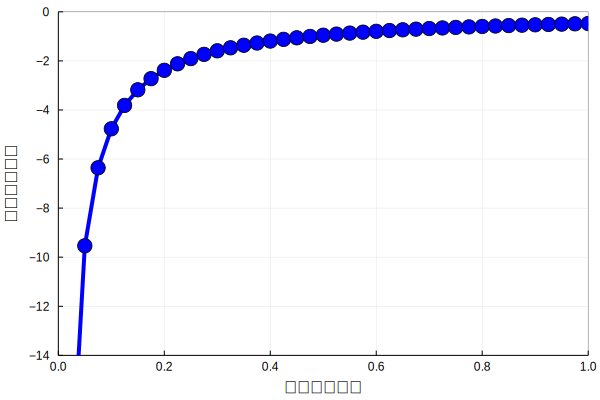

In [62]:
# 効用関数の図を描く
# これも**初回**は遅いのでしばらく待つ
plt = plot(params.grid_a, util2,
    color = :blue,
    marker = :circle,
    legend = :none,
    xlims = (0, 1),
    ylims = (-14, 0),
    xlabel = ("老年期の資産"),
    ylabel = ("老年期の効用"),
    linewidth = 4,
    markersize = 8,
    titlefont = font("HackGen35Nerd", 12),
    guidefont = font("HackGen35Nerd", 12),
    tickfont = font("HackGen35Nerd", 8),
    framestyle = :semi
)
#savefig("Fig2_utility_period2.pdf")

### 空の変数を作る
* ゼロが入っている変数：器の役割
    * ここに計算結果を代入していく
* 変数のサイズを予め決めておく点が重要
    * 計算途中でベクトルや行列のサイズが変わるような書き方をすると計算速度が**大幅に**低下する

In [63]:
# 配列(変数)をあらかじめ定義しておく
obj = zeros(params.na, params.nw) # 目的関数
pol = zeros(params.nw); # 政策関数

## 今回のアルゴリズムの中心
* テキスト(2.5)式を計算

In [64]:
# あらゆる(w,a)の組み合わせについて生涯効用を計算

for i = 1:params.nw # すべてのwの組み合わせについて
    for j = 1:params.na # すべてのaの組み合わせについて
        cons = params.grid_w[i] - params.grid_a[j] # c1 = w - a
        if cons > 0.0
            obj[j, i] = CRRA(cons, params.γ) + params.β*　CRRA((1.0+params.rent)*params.grid_a[j], params.γ)
        else
            # 消費が負値の場合、ペナルティを与えてその値が選ばれないようにする
            obj[j,i] = -10000.0
        end
    end
end

#### Tips：多重のループ計算でタブによる段落下げを行うと右側に行き過ぎて見にくい場合がある
* Pythonと違ってJuliaではタブによる段落下げそれ自体に特別な効果はない
    * 読みやすさのため
* Juliaの場合、ループ計算をひとまとめにすることが出来る：⬇

In [65]:
for i = 1:params.nw, j = 1:params.na # ここでひとまとめ
    cons = params.grid_w[i] - params.grid_a[j]
    if cons > 0.0
        obj[j, i] = CRRA(cons, params.γ) + params.β*　CRRA((1.0+params.rent)*params.grid_a[j], params.γ)
    else
        obj[j,i] = -10000.0
    end
end

---

## Tips：ループ(繰り返し計算)とは?

In [66]:
# 例：これを計算したいけど書くのが面倒
temp = 1 + 2 + 3 + 4 + 5 + 6 + 7 + 8 + 9 + 10

55

In [67]:
a = 0

# iが1から10までa = a + iを計算する
for i = 1:10
    a = a + i # =は同じではなく代入
end

print(a)

55

In [68]:
# 下記のような書き方も出来る
a = 0
for i in 1:10
    a += i
end
print(a)

55

---

In [69]:
#各wについて生涯効用を最大とするようなaを探す

for i = 1:params.nw

    # findmax：最大値(maxv)と最大値がある場所(maxl)を探す関数
    maxv, maxl = findmax(obj[:, i])

    # policy：最適貯蓄
    pol[i] = params.grid_a[maxl]

end

print(pol)

[0.025, 0.075, 0.1, 0.15, 0.17500000000000002, 0.225, 0.25, 0.27499999999999997, 0.325, 0.35]

In [70]:
? findmax

search: findmax findmax! findmin findmin!



```
findmax(f, domain) -> (f(x), index)
```

Returns a pair of a value in the codomain (outputs of `f`) and the index of the corresponding value in the `domain` (inputs to `f`) such that `f(x)` is maximised. If there are multiple maximal points, then the first one will be returned.

`domain` must be a non-empty iterable.

Values are compared with `isless`.

!!! compat "Julia 1.7"
    This method requires Julia 1.7 or later.


# Examples

```jldoctest
julia> findmax(identity, 5:9)
(9, 5)

julia> findmax(-, 1:10)
(-1, 1)

julia> findmax(first, [(1, :a), (3, :b), (3, :c)])
(3, 2)

julia> findmax(cos, 0:π/2:2π)
(1.0, 1)
```

---

```
findmax(itr) -> (x, index)
```

Return the maximal element of the collection `itr` and its index or key. If there are multiple maximal elements, then the first one will be returned. Values are compared with `isless`.

See also: [`findmin`](@ref), [`argmax`](@ref), [`maximum`](@ref).

# Examples

```jldoctest
julia> findmax([8, 0.1, -9, pi])
(8.0, 1)

julia> findmax([1, 7, 7, 6])
(7, 2)

julia> findmax([1, 7, 7, NaN])
(NaN, 4)
```

---

```
findmax(A; dims) -> (maxval, index)
```

For an array input, returns the value and index of the maximum over the given dimensions. `NaN` is treated as greater than all other values except `missing`.

# Examples

```jldoctest
julia> A = [1.0 2; 3 4]
2×2 Matrix{Float64}:
 1.0  2.0
 3.0  4.0

julia> findmax(A, dims=1)
([3.0 4.0], CartesianIndex{2}[CartesianIndex(2, 1) CartesianIndex(2, 2)])

julia> findmax(A, dims=2)
([2.0; 4.0;;], CartesianIndex{2}[CartesianIndex(1, 2); CartesianIndex(2, 2);;])
```


## これまでの計算過程をまとめて一つの関数にする

In [71]:
"""
2期間モデルを離散化によって解く

# インプット
`m::Models`::パラメータの構造体

# アウトプット
`obj::Vector`::価値関数
`pol::Vector`::政策関数
"""
function discretize(params::Models)

    # 配列をあらかじめ定義しておく
    obj = zeros(params.na, params.nw)
    pol = zeros(params.nw) # 政策関数

    # あらゆる(w,a)の組み合わせについて生涯効用を計算
    for i in 1:params.nw, j in 1:params.na
        cons = params.grid_w[i] - params.grid_a[j]
        if cons > 0.0
            obj[j, i] = CRRA(cons, params.γ) + params.β*　CRRA((1.0+params.rent)*params.grid_a[j], params.γ)
        else
            # 消費が負値の場合、ペナルティを与えてその値が選ばれないようにする
            obj[j,i] = -10000.0
        end
    end

    # 各wについて生涯効用を最大とするようなaを探す
    for i in 1:params.nw
        maxv, maxl = findmax(obj[:,i]);
        pol[i] = params.grid_a[maxl];
    end

    return obj,pol
end

discretize

## 実際に計算をしてみる

In [72]:
# 関数を実行
obj, pol = discretize(params)
print(pol)

[0.025, 0.075, 0.1, 0.15, 0.17500000000000002, 0.225, 0.25, 0.27499999999999997, 0.325, 0.35]

---

## なぜ関数にしたのか?
* Juliaの仕組み上、関数化した方が早い
    * LLVM Just-in-Compilerが働くため
* ループ内の変数のスコープの問題

---

In [73]:
# 計算速度を測る場合、@timeマクロを使う
# ⬇の書き方で計算時間を測ってくれる：実際の計算速度は使用しているPCに依存します
@time obj, pol = discretize(params)

  0.000015 seconds (12 allocations: 7.297 KiB)


([-25.451333231282213 -17.832285612234593 … -13.260857040806023 -13.143640923589906; -26.05899994897444 -12.725666615641106 … -7.235470537209735 -7.1116315279218085; … ; -10000.0 -10000.0 … -10000.0 -40.31071794610122; -10000.0 -10000.0 … -10000.0 -10000.0], [0.025, 0.075, 0.1, 0.15, 0.17500000000000002, 0.225, 0.25, 0.27499999999999997, 0.325, 0.35])

---

## 計算結果を出力してみよう

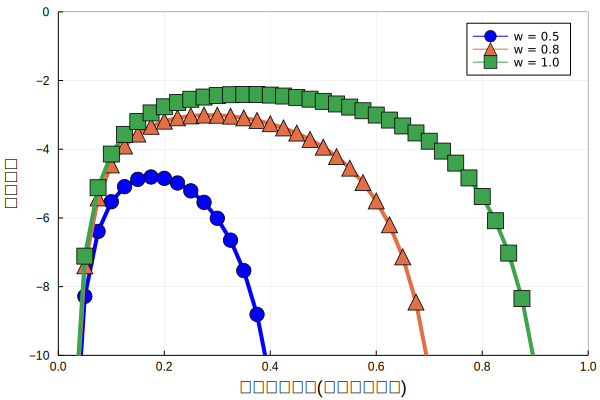

In [74]:
# 図2.1(a)
plt = plot(params.grid_a, obj[:,5],
    color = :blue,
    marker = :circle,
    legend = :topright,
    xlims = (0, 1),
    ylims = (-10, 0),
    xlabel = ("若年期の貯蓄(老年期の資産)"),
    ylabel = ("生涯効用"),
    label = ("w = 0.5"),
    linewidth = 4,
    markersize = 8,
    titlefont = font("HackGen35Nerd", 12),
    guidefont = font("HackGen35Nerd", 12),
    tickfont = font("HackGen35Nerd", 8),
    framestyle = :semi
)
plot!(params.grid_a, obj[:,8], lw = 4, markershape=:utriangle, markersize = 8, label = "w = 0.8")
plot!(params.grid_a, obj[:,10], lw = 4, markershape=:rect, markersize = 8, label = "w = 1.0")
#savefig("Fig2_utility_max.pdf")

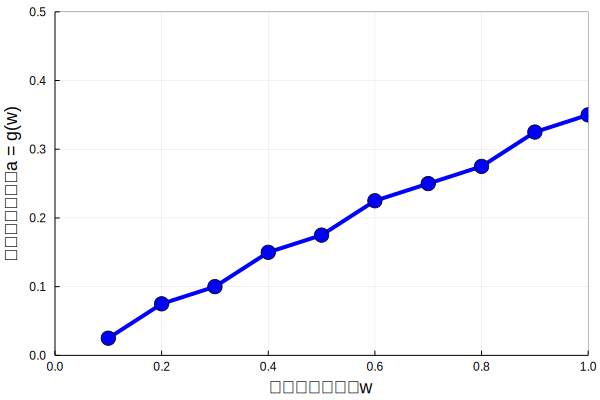

In [75]:
# 図2.1(b)
plt = plot(params.grid_w, pol,
    color = :blue,
    marker = :circle,
    legend = :none,
    xlims = (0, 1.0),
    ylims = (0, 0.5),
    xlabel = ("若年期の所得：w"),
    ylabel = ("若年期の貯蓄：a = g(w)"),
    linewidth = 4,
    markersize = 8,
    titlefont = font("HackGen35Nerd", 12),
    guidefont = font("HackGen35Nerd", 12),
    tickfont = font("HackGen35Nerd", 8),
    framestyle = :semi
)
#savefig("Fig2_pol_discr.pdf")

---

## エクササイズ
* グリッドの数を増やして、政策関数の精度を高めてみよう。